In [18]:
# setup dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 
import re

In [19]:
# Upload csv file
csv = pd.read_csv("clean_data.csv", low_memory=False)

In [20]:
# display data
csv.head()

,id,brand,primaryCategories,colors,ean / upc,manufacturer,name,prices.amountMax,prices.amountMin,prices.availability,...,color 4,color 5,color 6,category 1,category 2,category 3,category 4,category 5,category 6,category 7
0,AV2A4MxtvKc47QAVol_G,Nomad,Shoes,"Bluewhite Flower Burst,Blue/White Flower Burst",638000000000,Nomad Footwear,Women's Puddles Boot,36.00,36.00,False,...,Burst,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,Backpacking Boots,All Women's Shoes
1,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
2,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
3,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
4,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN


In [25]:
# find the different kinds of shoes we are looking for: flats, athletic shoe, boot, sandal/filp flops, heels/pumps, other

names = ["boot" if "boot" in name else "other" for name in shoe_data["name"]]

#print(names)

for index,name in shoe_data["name"].iteritems():
    #print(name)
    if bool(re.search("boot*",name.lower())):
        csv.loc[index,"Shoe Category"] = "boot"
    elif bool(re.search("flat*",name.lower())):
        csv.loc[index,"Shoe Category"] = "flat"
    elif bool(re.search("loafer*",name.lower())):
        csv.loc[index,"Shoe Category"] = "flat"
    elif bool(re.search("athletic*",name.lower())):
        csv.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("sneaker*",name.lower())):
        csv.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("walk*",name.lower())):
        csv.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("run*",name.lower())):
        csv.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("sandal*",name.lower())):
        csv.loc[index,"Shoe Category"] = "sandal"
    elif bool(re.search("flip*",name.lower())):
        csv.loc[index,"Shoe Category"] = "sandal"
    elif bool(re.search("heel*",name.lower())):
        csv.loc[index,"Shoe Category"] = "heel"
    elif bool(re.search("pump*",name.lower())):
        csv.loc[index,"Shoe Category"] = "heel"
    else:
        csv.loc[index,"Shoe Category"] = "other"

shoe_category = csv["Shoe Category"] 

csv["Shoe Category"] = shoe_category

csv.head()

,id,brand,primaryCategories,colors,ean / upc,manufacturer,name,prices.amountMax,prices.amountMin,prices.availability,...,color 5,color 6,category 1,category 2,category 3,category 4,category 5,category 6,category 7,Shoe Category
0,AV2A4MxtvKc47QAVol_G,Nomad,Shoes,"Bluewhite Flower Burst,Blue/White Flower Burst",638000000000,Nomad Footwear,Women's Puddles Boot,36.00,36.00,False,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,Backpacking Boots,All Women's Shoes,boot
1,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat
2,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat
3,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat
4,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat


In [26]:
# count the types of shoes
shoe_count = csv["Shoe Category"].value_counts()

shoe_count

boot        3393
other       2028
sandal      1234
flat        1210
athletic    1118
heel        1017
Name: Shoe Category, dtype: int64

([<matplotlib.patches.Wedge at 0x2c1b97c6730>,
 [Text(-1.119740151173585, -0.4314881155370999, 'Boots'),
  Text(0.5274373994417351, -0.9653029522746419, 'Other'),
  Text(1.09883959070395, -0.050512908266852716, 'Sandals'),
  Text(0.8256297594285867, 0.7268669068996705, 'Athletic'),
  Text(0.12902411686487736, 1.0924068734987156, 'Flat'),
  Text(-0.5779208928693819, 0.9359526919588708, 'Heel')],
 [Text(-0.6531817548512577, -0.25170140072997493, '33.9%'),
  Text(0.2876931269682191, -0.5265288830588956, '20.3%'),
  Text(0.5993670494748818, -0.027552495418283297, '12.3%'),
  Text(0.4503435051428654, 0.3964728583089111, '12.1%'),
  Text(0.07037679101720583, 0.595858294635663, '11.2%'),
  Text(-0.31522957792875367, 0.5105196501593839, '10.2%')])

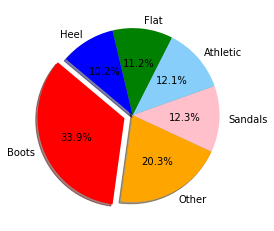

In [27]:
# create pie chart for the different kinds of shoes for women that are produced based on this dataset

# labels for the pie chart
labels = ["Boots", "Other", "Sandals", "Athletic", "Flat", "Heel"]

# the number of shoes produced for each category
sizes = shoe_count

# set colors for each shoe category for our pie chart
colors = ["red", "orange", "pink", "lightskyblue", "green", "blue"]

# seperate the "Others" section from the others
explode = (0.1, 0, 0, 0, 0, 0)

# create pie chart to display kinds of shoe values for women
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

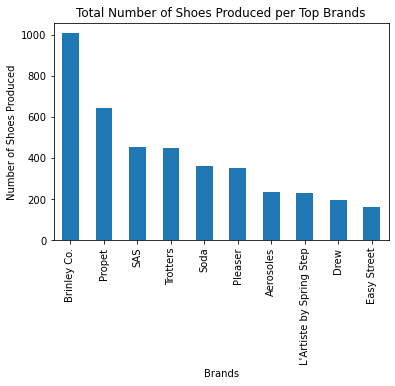

In [28]:
# list the brand that produces the highest number of shoes based on frequency
brands = csv["brand"].value_counts()

# sort by the top 10 brands that produce the most shoes
#top_brands = shoe_data.groupby("brand").shoe_counts.nlargest(10).reset_index()
top_brands = brands.head(10)

# create bar chart
top_brands.plot(kind="bar")
plt.ylabel("Number of Shoes Produced")
plt.xlabel("Brands")
plt.title("Total Number of Shoes Produced per Top Brands")
plt.show()